# Recurrent Neural Network

Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Data Pre-processing

Importing the training set

In [ ]:
dataset_training = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_training.iloc[:,1:2].values

Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

Creating a Data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(100,1258) : 
  X_train.append(training_set_scaled[i-100:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)  

Reshaping Arrays as inputs to RNN

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

# Recurrent Neural Network

Importing the Libraries and necessary packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Initialising the RNN

In [ ]:
regressor = Sequential()

Adding the first LSTM and some Dropout Regularization

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

Adding the second and third LSTM layer and some dropout regularization

In [ ]:
regressor.add(LSTM(units =50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units =50,return_sequences = True))
regressor.add(Dropout(0.2))

Adding the last LSTM layer and some dropout regularization

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

Adding the Output layer

In [ ]:
regressor.add(Dense(units =1))

#Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Fitting the RNN to the training set

In [ ]:
regressor.fit(X_train, y_train,batch_size = 32, epochs = 100)

Epoch 1/100
37/37 [==============================] - 15s 231ms/step - loss: 0.0374
Epoch 2/100
37/37 [==============================] - 8s 229ms/step - loss: 0.0056
Epoch 3/100
37/37 [==============================] - 7s 199ms/step - loss: 0.0060
Epoch 4/100
37/37 [==============================] - 6s 160ms/step - loss: 0.0044
Epoch 5/100
37/37 [==============================] - 6s 160ms/step - loss: 0.0044
Epoch 6/100
37/37 [==============================] - 6s 158ms/step - loss: 0.0045
Epoch 7/100
37/37 [==============================] - 6s 159ms/step - loss: 0.0048
Epoch 8/100
37/37 [==============================] - 6s 157ms/step - loss: 0.0040
Epoch 9/100
37/37 [==============================] - 6s 159ms/step - loss: 0.0043
Epoch 10/100
37/37 [==============================] - 6s 158ms/step - loss: 0.0040
Epoch 11/100
37/37 [==============================] - 6s 157ms/step - loss: 0.0041
Epoch 12/100
37/37 [==============================] - 6s 156ms/step - loss: 0.0039
Epoch 13/100

# Making the predictions and visualising the results

Getting the real stock price 

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

Getting the predicted stock price

In [ ]:
dataset_total = pd.concat((dataset_training['Open'],dataset_test['Open']),axis =0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-100:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(100,120):
  X_test.append(inputs[i-100:i,0])
X_test = np.array(X_test)  
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))  
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  

# Visualising the results

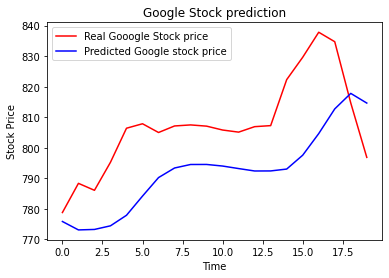

In [ ]:
plt.plot(real_stock_price,color = 'red',label = 'Real Gooogle Stock price')
plt.plot(predicted_stock_price,color = 'blue', label = 'Predicted Google stock price')
plt.xlabel('Time')
plt.title('Google Stock prediction')
plt.ylabel('Stock Price')
plt.legend()
plt.show()